In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [14]:
d1 = pd.read_excel('Data.xlsx')
d1

,Order_ID,TAKEAWAY/SEATING/PICKUP,DATE,DAY,TIME,SERVER,ITEM,QUANTITY,PRICE,TOTAL,ALLERGIES,FOOD TYPE,WEEK NUMBER
0,139017,SEAT,2020-06-19,FRIDAY,16:02:00,JILLIAN N.,FISH & CHIPS 2 PIECE,1,22,22,NO,ENTRÉE,WEEK 1
1,138938,SEAT,2020-06-19,FRIDAY,11:29:00,ASHLEY C.,FAST FARE BREAKFAST,1,10,10,NO,BREAKFAST,WEEK 1
2,138938,SEAT,2020-06-19,FRIDAY,11:29:00,ASHLEY C.,CHIC COBB SALAD SMALL,1,14,14,NO,SALAD,WEEK 1
3,138938,SEAT,2020-06-19,FRIDAY,11:29:00,ASHLEY C.,THAI PRAWN SALAD LARGE,1,18,18,NO,SALAD,WEEK 1
4,138908,TAKEAWAY,2020-06-19,FRIDAY,09:46:00,ASHLEY C.,FAST FARE BREAKFAST,1,10,10,NO,BREAKFAST,WEEK 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1492,146023,SEAT,2020-07-21,TUESDAY,16:50:00,JILLIAN N.,CHICKEN GYOZA,1,14,14,NO,STARTERS,WEEK 5
1493,146013,PICKUP,2020-07-21,TUESDAY,16:27:00,ASHLEY C.,GINGER BEEF,1,18,18,NO,RICE BOWLS AND PASTA,WEEK 5
1494,146013,PICKUP,2020-07-21,TUESDAY,16:27:00,ASHLEY C.,AHI TUNA POKE BOWL,1,21,21,NO,RICE BOWLS AND PASTA,WEEK 5
1495,146013,PICKUP,2020-07-21,TUESDAY,16:27:00,ASHLEY C.,JAMBALYA,1,20,20,NO,RICE BOWLS AND PASTA,WEEK 5


In [15]:
d2 = d1[['Order_ID', 'DATE', 'DAY','TIME','TOTAL','WEEK NUMBER']]
d2

,Order_ID,DATE,DAY,TIME,TOTAL,WEEK NUMBER
0,139017,2020-06-19,FRIDAY,16:02:00,22,WEEK 1
1,138938,2020-06-19,FRIDAY,11:29:00,10,WEEK 1
2,138938,2020-06-19,FRIDAY,11:29:00,14,WEEK 1
3,138938,2020-06-19,FRIDAY,11:29:00,18,WEEK 1
4,138908,2020-06-19,FRIDAY,09:46:00,10,WEEK 1
...,...,...,...,...,...,...
1492,146023,2020-07-21,TUESDAY,16:50:00,14,WEEK 5
1493,146013,2020-07-21,TUESDAY,16:27:00,18,WEEK 5
1494,146013,2020-07-21,TUESDAY,16:27:00,21,WEEK 5
1495,146013,2020-07-21,TUESDAY,16:27:00,20,WEEK 5


In [16]:
group = d2.groupby('Order_ID')
d3 = group['TOTAL'].agg([np.sum])
d3

,sum
Order_ID,
138908,22
138918,10
138923,12
138933,81
138935,8
...,...
146130,45
146134,14
146144,69


In [17]:
group2 = d2.groupby('DATE')
d4 = group2['TOTAL'].agg([np.sum])
d4

,sum
DATE,
2020-06-19,493
2020-06-20,694
2020-06-21,700
2020-06-24,537
2020-06-25,843
2020-06-26,998
2020-06-27,860
2020-06-28,453
2020-06-29,306


In [18]:
group3 = d2.groupby('WEEK NUMBER')
d5 = group3['TOTAL'].agg([np.sum])
d5

,sum
WEEK NUMBER,
WEEK 1,3267
WEEK 2,4313
WEEK 3,5541
WEEK 4,4850
WEEK 5,3991


In [19]:
group4 = d2.groupby('DAY')
d6 = group4['TOTAL'].agg([np.sum])
d6

,sum
DAY,
FRIDAY,4731
MONDAY,2241
SATURDAY,3518
SUNDAY,3139
THURSDAY,1978
TUESDAY,3935
WEDNESDAY,2420


In [20]:
d6['Cumulative Revenue'] = d6['sum'].cumsum()
d6['Cumulative Percentage'] = 100*d6['Cumulative Revenue']/d6['sum'].sum()

In [21]:
d3['Cumulative Revenue'] = d3['sum'].cumsum()
d3['Cumulative Percentage'] = 100*d3['Cumulative Revenue']/d3['sum'].sum()

In [22]:
d4['Cumulative Revenue'] = d4['sum'].cumsum()
d4['Cumulative Percentage'] = 100*d4['Cumulative Revenue']/d4['sum'].sum()

In [23]:
d5['Cumulative Revenue'] = d5['sum'].cumsum()
d5['Cumulative Percentage'] = 100*d5['Cumulative Revenue']/d5['sum'].sum()

In [24]:
d3

,sum,Cumulative Revenue,Cumulative Percentage
Order_ID,,,
138908,22,22,0.100173
138918,10,32,0.145706
138923,12,44,0.200346
138933,81,125,0.569165
138935,8,133,0.605591
...,...,...,...
146130,45,21771,99.130316
146134,14,21785,99.194062
146144,69,21854,99.508242


In [25]:
d6


,sum,Cumulative Revenue,Cumulative Percentage
DAY,,,
FRIDAY,4731,4731,21.541754
MONDAY,2241,6972,31.745743
SATURDAY,3518,10490,47.764320
SUNDAY,3139,13629,62.057190
THURSDAY,1978,15607,71.063655
TUESDAY,3935,19542,88.980967
WEDNESDAY,2420,21962,100.000000


In [26]:
d4

,sum,Cumulative Revenue,Cumulative Percentage
DATE,,,
2020-06-19,493,493,2.244786
2020-06-20,694,1187,5.404790
2020-06-21,700,1887,8.592114
2020-06-24,537,2424,11.037246
2020-06-25,843,3267,14.875694
2020-06-26,998,4265,19.419907
2020-06-27,860,5125,23.335762
2020-06-28,453,5578,25.398415
2020-06-29,306,5884,26.791731


C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


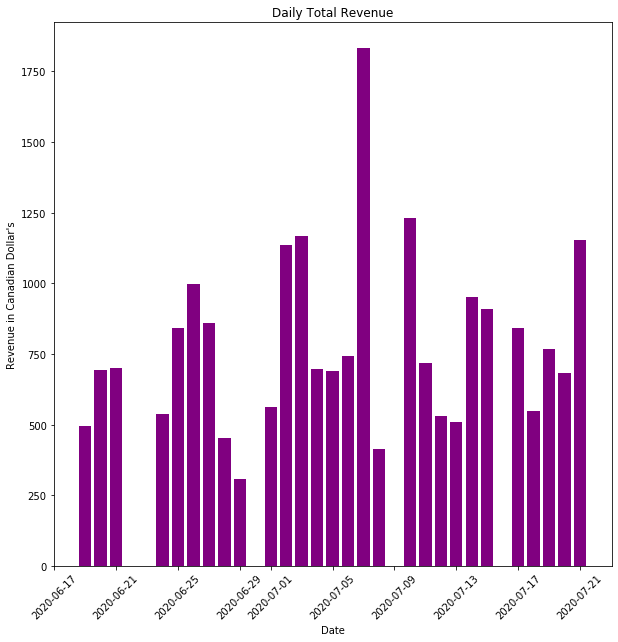

In [27]:

fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.bar(d4.index.values,
        d4['sum'],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Revenue in Canadian Dollar's",
       title="Daily Total Revenue")

# Rotate tick marks on x-axis
plt.setp(ax.get_xticklabels(), rotation=45)



plt.show()

In [28]:
d5

,sum,Cumulative Revenue,Cumulative Percentage
WEEK NUMBER,,,
WEEK 1,3267,3267,14.875694
WEEK 2,4313,7580,34.514161
WEEK 3,5541,13121,59.744103
WEEK 4,4850,17971,81.827702
WEEK 5,3991,21962,100.000000


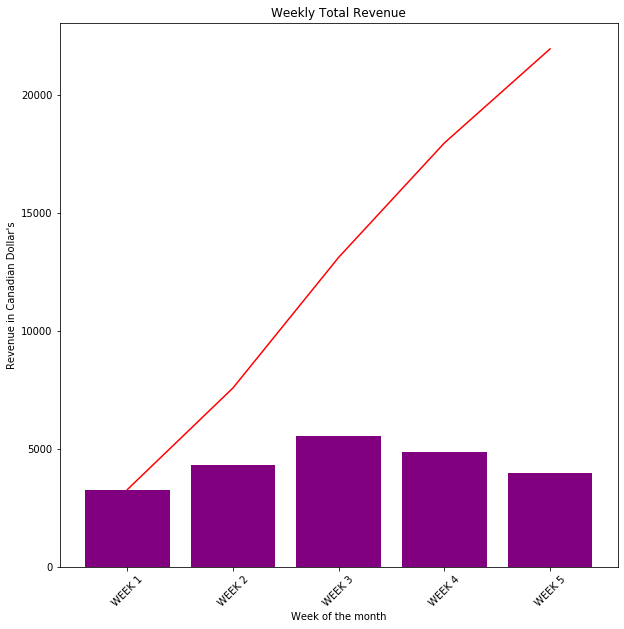

In [29]:
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.bar(d5.index.values,
        d5['sum'],
        color='purple')
ax.plot(d5.index.values, d5['Cumulative Revenue'], color = 'red')
# Set title and labels for axes
ax.set(xlabel="Week of the month",
       ylabel="Revenue in Canadian Dollar's",
       title="Weekly Total Revenue")

# Rotate tick marks on x-axis
plt.setp(ax.get_xticklabels(), rotation=45)



plt.show()

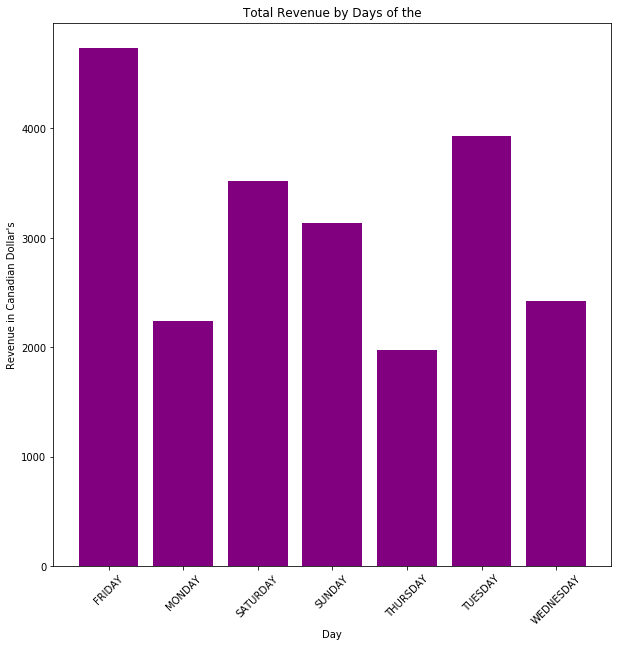

In [30]:
fig, ax = plt.subplots(figsize=(10, 10))

# Add x-axis and y-axis
ax.bar(d6.index.values,
        d6['sum'],
        color='purple')

# Set title and labels for axes
ax.set(xlabel="Day",
       ylabel="Revenue in Canadian Dollar's",
       title="Total Revenue by Days of the")

# Rotate tick marks on x-axis
plt.setp(ax.get_xticklabels(), rotation=45)



plt.show()